##  Project #1

### An Analysis on the Inspection of Restaurants and other Food Establishments in Chicago from Janguary 1, 2010 to Present

<dl>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;This project analyzes the causes of heart disease through a database of people with heart disease collected by Kaggle <a href="https://www.kaggle.com/ronitf/heart-disease-uci">Heart Disease UCI</a>.  , and uses these data to draw conclusions on the fact and how to prevent people with heart disease from having a greater impact on their behavior
</dl>
<d9>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The dataset that is used in this project is from the <a href="https://www.kaggle.com/ronitf/heart-disease-uci">Heart Disease UCI</a>. but has been imported as a csv file and altered for ease of use. </d9>





## The specific explanation of each column is as follows
1. age
2. sex (male = 1 female = 0)
3. chest pain type (4 values)
4. resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl (1 = true 0 = false)
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina (1 = yes 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. Thalassemia : 3 = normal; 6 = fixed defect; 7 = reversable defect


In [40]:
#This block of code is for importing the packages that are utilized in this project.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import sys
from sklearn.preprocessing import LabelEncoder
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../utils')))
import _utils as utils


%matplotlib inline

## Dataset

This section imports the dataset and provides a brief representation of the general dataset.

In [41]:
#This block of code imports both the local csv file and the online dataset.
data = pd.read_csv('data.csv')
data.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Age Analysis


In [42]:
d_young = data[ (data['age'] >= 18) & (data['age'] <= 35) ]
d_middle = data[ (data['age'] >= 36) & (data['age'] <= 55) ]
d_old= data[ (data['age'] >= 56)]
d_age = d_young.append(d_middle).append(d_old)

d_age.loc[d_age.age  <= 35, 'Age Group'] = 'Young' 
d_age.loc[d_age.age  >= 56, 'Age Group'] = 'Old' 
d_age.loc[(d_age.age  >= 36) & (d_age.age <= 55), 'Age Group'] = 'Middle Age' 

d_age.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age Group
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1,Young
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1,Young
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1,Young
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1,Young
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1,Young


### Young Adulthood

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
        0., 0., 4.]),
 array([29. , 29.3, 29.6, 29.9, 30.2, 30.5, 30.8, 31.1, 31.4, 31.7, 32. ,
        32.3, 32.6, 32.9, 33.2, 33.5, 33.8, 34.1, 34.4, 34.7, 35. ]),
 <a list of 20 Patch objects>)

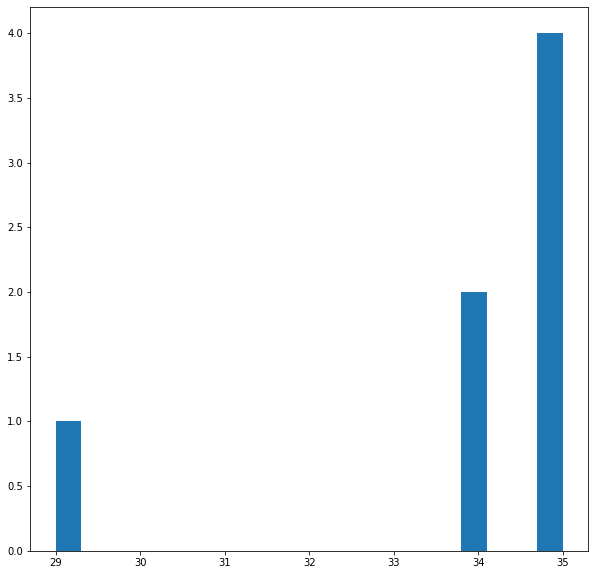

In [43]:
fig = plt.figure(figsize=(10,10))
young = d_age[d_age['Age Group'] == 'Young']
plt.hist(young['age'] , bins=20)


## Here we can see that there is no heart disease patients with age 30 to 33 in the "Young" section


(array([ 2.,  3.,  4.,  3., 10.,  8.,  8., 11.,  8.,  0.,  7.,  5.,  7.,
         5.,  7., 12., 13.,  8., 16.,  8.]),
 array([37. , 37.9, 38.8, 39.7, 40.6, 41.5, 42.4, 43.3, 44.2, 45.1, 46. ,
        46.9, 47.8, 48.7, 49.6, 50.5, 51.4, 52.3, 53.2, 54.1, 55. ]),
 <a list of 20 Patch objects>)

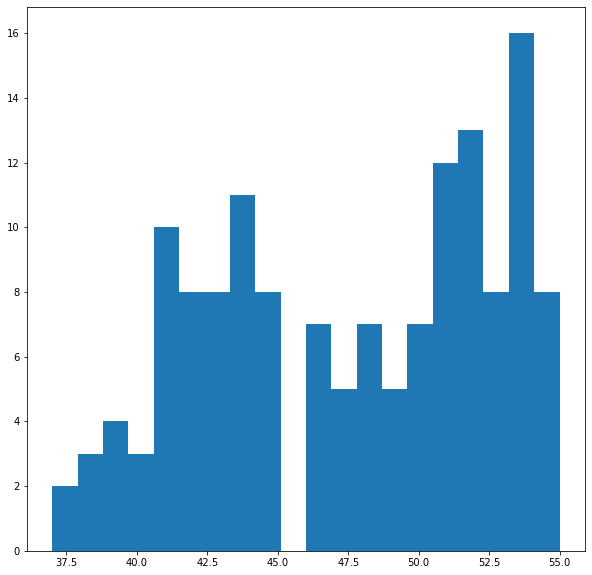

In [44]:
fig = plt.figure(figsize=(10,10))
middle = d_age[d_age['Age Group'] == 'Middle Age']
plt.hist(middle['age'] , bins=20)


## For the heart disease patients in the section of "Middle Age", the data has no pattern. Again, it proves older people have higher chance to get the heart dieases.  

(array([28., 19., 14., 11.,  8., 11.,  9., 10.,  8.,  7.,  9.,  4.,  3.,
         4.,  3.,  0.,  0.,  1.,  0.,  2.]),
 array([56.  , 57.05, 58.1 , 59.15, 60.2 , 61.25, 62.3 , 63.35, 64.4 ,
        65.45, 66.5 , 67.55, 68.6 , 69.65, 70.7 , 71.75, 72.8 , 73.85,
        74.9 , 75.95, 77.  ]),
 <a list of 20 Patch objects>)

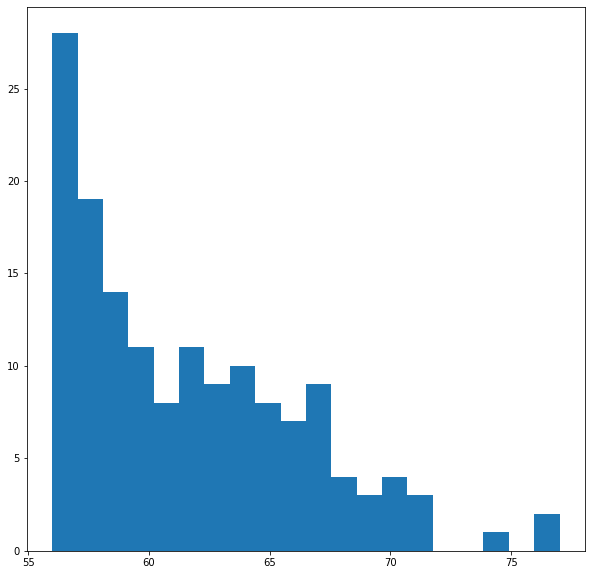

In [45]:
fig = plt.figure(figsize=(10,10))
old = d_age[d_age['Age Group'] == 'Old']
plt.hist(old['age'] , bins=20)

##  For the heart disease patients in the section of "Old", people with older age is much less than the people with relatively young age. While, we miss a factor, which people could have chance to be die of old age

In [46]:
d_age['Age Group'].value_counts()

Old           151
Middle Age    145
Young           7
Name: Age Group, dtype: int64

## Gender Analysis

In [47]:
d_Male = data[ (data['sex'] == 1 ) ]
d_Female = data[ (data['sex'] == 0) ]
d_sex = d_Male.append(d_Female)
d_sex.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


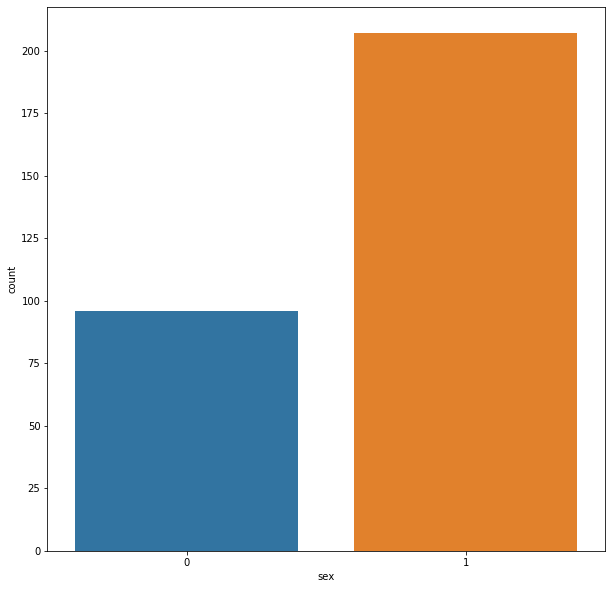

In [48]:
fig = plt.figure(figsize=(10,10))
sns.countplot(d_age['sex'])

In [49]:
d_sex['sex'].max()
# Male patients

1

In [50]:
d_sex['sex'].min()
# Female patients

0

In [51]:
d_sex['sex'].value_counts()
# male patients twice as much ass female patients

1    207
0     96
Name: sex, dtype: int64

## Does exercise help patient to increas the max heart rate or cause the chest pain?

In [52]:
exercise_angina =d_age[d_age['exang'] == 0]['thalach']
exercise_non_angina= d_age[d_age['exang'] == 1]['thalach']
x = exercise_angina.mean()
y = exercise_non_angina.mean()
d = x - y 
d


18.469251336898395

## Null hypothesis: The max heart rate of patients that who have chest pain during the exrcise is same as the patients who do not feel chest pain

## Alternate hypothesis: The max heart rate of patients that who have chest pain during the exrcise is different than the patients who do not feel chest pain

Text(0.5, 0.98, 'Bootstrap Distrubution of Difference Between the Max Heart rate of exercise induced angina  and exercise do not induced angina')

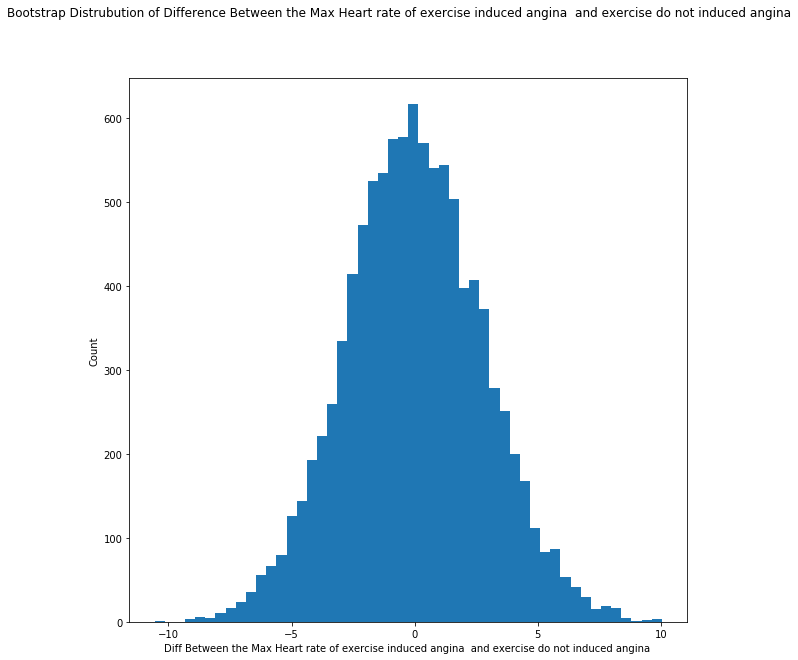

In [53]:
np.random.seed(42)
diff = utils.bootstrap_mean_diff(exercise_angina,exercise_non_angina)
fig = plt.figure(figsize = (10,10))
plt.hist(diff, bins =50)
plt.xlabel('Diff Between the Max Heart rate of exercise induced angina  and exercise do not induced angina ')
plt.ylabel('Count')
fig.suptitle('Bootstrap Distrubution of Difference Between the Max Heart rate of exercise induced angina  and exercise do not induced angina')

   ## Let say the significant level of the test is 0.05, what are the rejection region

In [54]:

print("We can reject hypothesis if the value is less than",np.percentile(diff,2.5))
print("We can reject hypothesis if the value is More than",np.percentile(diff,97.5))

print( "p-value:", (1-( stats.percentileofscore(diff, x-y) *0.01 )  )*2  )




We can reject hypothesis if the value is less than -5.415853386809279
We can reject hypothesis if the value is More than 5.641711229946537
p-value: 0.0


## We can reject the null hypothesis, since the p-value is less than 0.05. It also claim that there is a big difference between the number of patients who have chest pain and who do not have chest pain

## Let's set the new null hypothesis and alternate hypothesis 

## Null Hypothesis: The max heart rate of patients with chest pain during the exrcise is less than the patients who do not feel chest pain

## Alternate hypothesis: The max heart rate of patients with chest pain during the exrcise is more than the patients who do not feel chest pain

In [55]:
print("The p-value here is ", 1- (stats.percentileofscore(diff, x-y) *0.01 ))
print("we can reject the null hypothesis")


The p-value here is  0.0
we can reject the null hypothesis


## There is a resarch about the exercise would increase the max heart rate, and the higher max heart rate would have lower risk of heart dieases. However, by analyzing and comparing the patient's max heart rate, the max heart rate of patients with chest pain caused by exercise is higher than that of patients who do not experience chest pain during exercise.
## Reference: https://www.health.harvard.edu/heart-health/what-your-heart-rate-is-telling-you

## According to data and the Hypothesis Test above, it is not entirely correct to say that a higher max heart rate will help people prevent heart disease effectively. The causes of heart disease can be divided into congenital and acquired. Congenital heart disease cannot be prevented, and acquired heart disease is not simply avoided by increasing the max heart rate through exercise

## Does the patients who have high blood pressure and high serum cholestoral at the same time?


Text(0.5, 0.92, 'resting blood pressure vs. serum cholestoral')

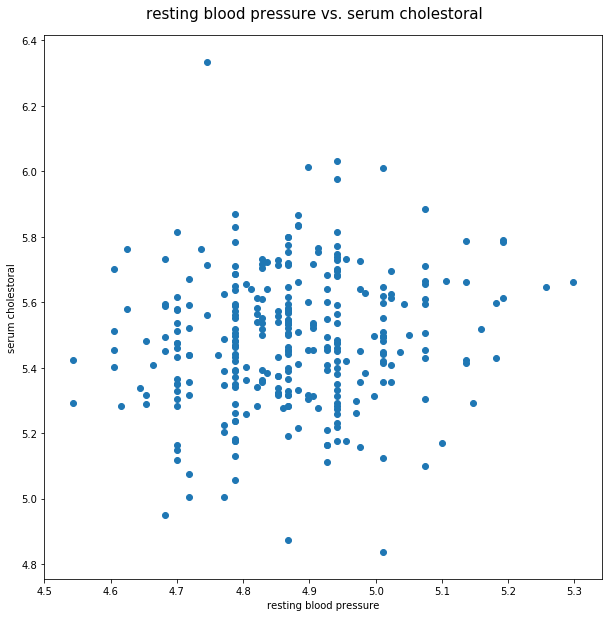

In [56]:
fig= plt.figure(figsize = (10,10))
plt.scatter(np.log(d_age['trestbps']), np.log(d_age['chol']))
plt.xlabel('resting blood pressure')
plt.ylabel('serum cholestoral')
fig.suptitle('resting blood pressure vs. serum cholestoral', fontsize=15, y=0.92)


Text(0.5, 0.92, 'Resting Blood Pressure vs. Serum Cholestoral')

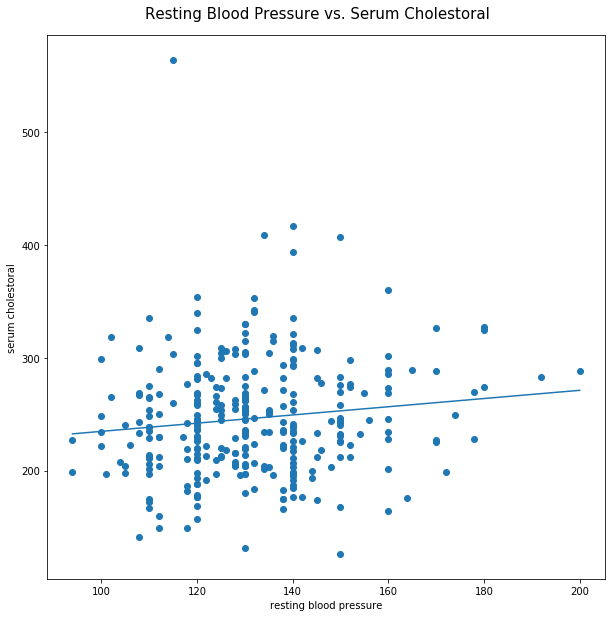

In [59]:
d_age = d_age.reset_index(drop = True)
slope, intercept, predictions, residuals = utils.evaluate_linear_relationship(d_age['trestbps'], d_age['chol'])
fig= plt.figure(figsize = (10,10))
plt.scatter(d_age['trestbps'], d_age['chol'])
sorted_order = np.argsort(d_age['trestbps'])
plt.plot((d_age['trestbps'])[sorted_order], predictions[sorted_order] )
plt.xlabel('resting blood pressure')
plt.ylabel('serum cholestoral')
fig.suptitle('Resting Blood Pressure vs. Serum Cholestoral', fontsize=15, y=0.92)



Text(0.5, 0.92, 'Residuals')

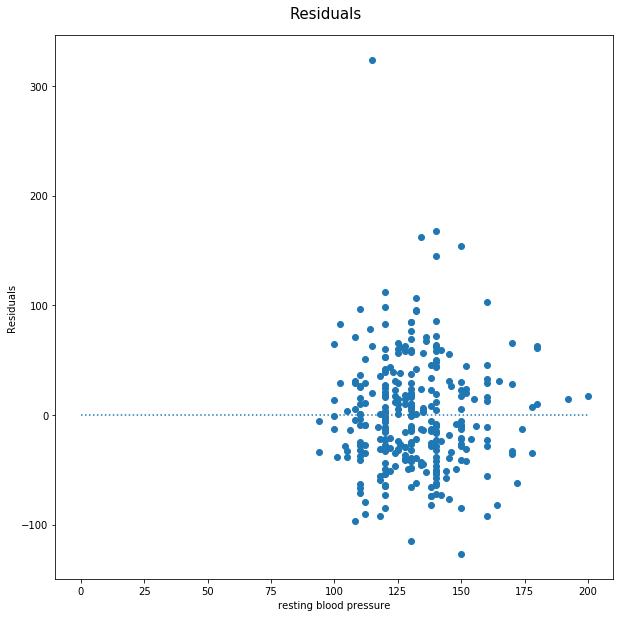

In [60]:
fig= plt.figure(figsize = (10,10))
plt.scatter(d_age['trestbps'], residuals)
plt.plot([0, d_age['trestbps'].max()],[0,0], linestyle = 'dotted')

plt.xlabel('resting blood pressure')
plt.ylabel('Residuals')
fig.suptitle('Residuals', fontsize=15, y=0.92)

In [61]:
print(np.var(predictions)/np.var(d_age['chol']))


0.01517188515488403
The linear relationship between two variable is not strong
It suprise me because there should be a relationship between High blood pressure and high cholesterol becuase When the artery becomes hard and narrows due to cholesterol plaque and calcium, the heart must draw more effort to draw blood. As a result, blood pressure will rise abnormally.
Reference: https://www.webmd.com/cholesterol-management/guide/diseases-linked-high-cholesterol


## The linear relationship between two variable is not strong. It suprise me because there should be a relationship between High blood pressure and high cholesterol becuase When the artery becomes hard and narrows due to cholesterol plaque and calcium, the heart must draw more effort to draw blood. As a result, blood pressure will rise abnormally.

## Reference: https://www.webmd.com/cholesterol-management/guide/diseases-linked-high-cholesterol

## Does exercise would cause more chest pain?


0    95
1    15
Name: exang, dtype: int64

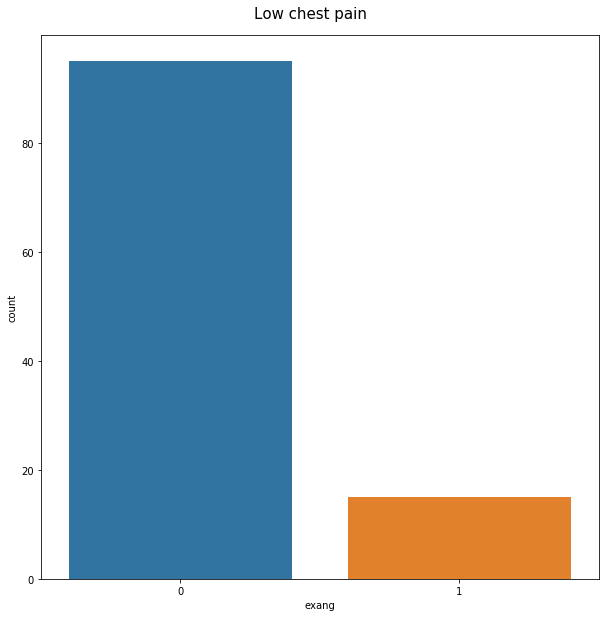

In [37]:
fig= plt.figure(figsize = (10,10))
low_cp = d_age[d_age['cp']>= 2]['exang']
high_cp = d_age[d_age['cp']< 2]['exang']


sns.countplot(low_cp)
fig.suptitle('Low chest pain', fontsize=15, y=0.92)
low_cp.value_counts()

0    109
1     84
Name: exang, dtype: int64

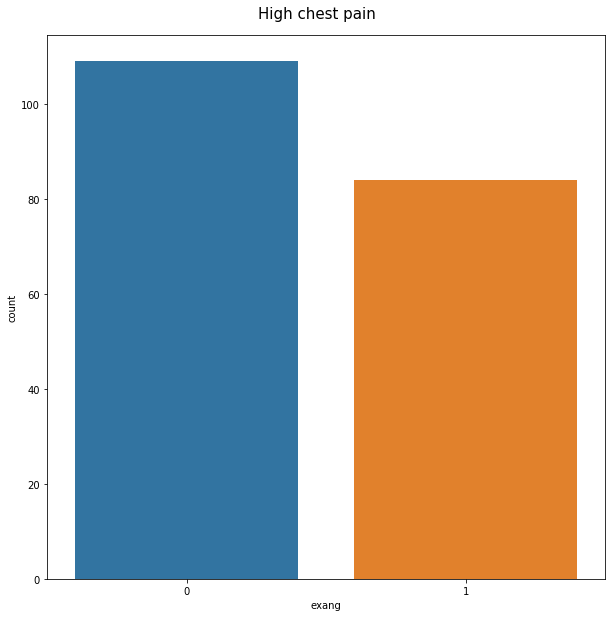

In [38]:
fig= plt.figure(figsize = (10,10))
sns.countplot(high_cp)
fig.suptitle('High chest pain', fontsize=15, y=0.92)
high_cp.value_counts()

## Will high blood sugar and high blood pressure be the cause of heart disease?

In [39]:
data2 = data[(data['trestbps'] >= 140) & ( data['thalach'] >= 100)]
data2['sex'].value_counts().sum() / data.shape[0]




0.31353135313531355

## In the database, the patients with high blood sugar and high blood pressure is only 31%, It doesn't seem to be a direct cause of heart disease。

## From the above analysis, we can conclude that there are more male patients with heart disease than women.  From the data point of view, high blood sugar and high blood is not the main cause of heart disease. 

## Does a higher max heart rate cause more pain for people?

In [62]:
HR_less_angina =d_age[d_age['cp'] <= 2]['thalach']
HR_more_angina= d_age[d_age['cp'] > 2]['thalach']
x = HR_less_angina.mean()
y = HR_more_angina.mean()
d = x - y 
d

-6.827950310559004

## Null hypothesis: the max heart rate between patients with less angina same as the patients with high angina

## Alternate hypothesis: the max heart rate between patients with less angina different than the patients with high angina

Text(0.5, 0.98, 'Bootstrap Distrubution of Difference between the max heart rate of patients with less angina and high angina')

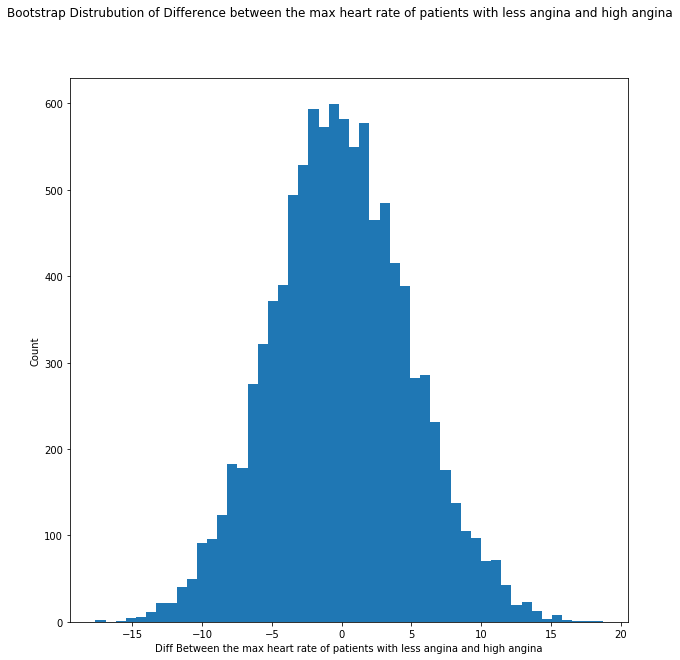

In [27]:
np.random.seed(42)
diff = utils.bootstrap_mean_diff(HR_less_angina,HR_more_angina)
fig = plt.figure(figsize = (10,10))
plt.hist(diff, bins =50)
plt.xlabel('Diff Between the max heart rate of patients with less angina and high angina')
plt.ylabel('Count')
fig.suptitle('Bootstrap Distrubution of Difference between the max heart rate of patients with less angina and high angina')

   ## Let say the significant level of the test is 0.05, what are the rejection region

In [28]:
print("Mean difference:", x -y)
print("We can reject hypothesis if the value is less than",np.percentile(diff,2.5))
print("We can reject hypothesis if the value is More than",np.percentile(diff,97.5))

print( "p-value:", (stats.percentileofscore(diff, x-y) *0.01) *2  )


Mean difference: -6.827950310559004
We can reject hypothesis if the value is less than -9.603881987577637
We can reject hypothesis if the value is More than 10.015838509316751
p-value: 0.16280000000000003


## We can not reject the null hypothesis because the p-value is not less than 0.05. The max heart rate of patients have no big diffence with the high of low angina

## Let's set the new null hypothesis and alternate hypothesis 

## Null Hypothesis: The max heart rate of patients with less angina is less than the patients with high angina

## Alternate Hypothesis: The max heart rate of patients  with less angina is more than the patients with high angina

In [29]:
print("The p-value here is ",0.01 * stats.percentileofscore(diff, x-y))


The p-value here is  0.08140000000000001


## We can not reject the null hypothesis because the p-value is not lower than 0.05. It also prove that although the data is more or less biased towards a higher max heart rate, it will cause more chest pain, but its averge value  is not in the rejection region. Therefore, the max heart rate of patients can not decide the level of chest pain of the patients.


## Conclsion

## Through a series of analyses of Heart Disease UCI from Kaggle. We can draw some similarities and differences among people with heart disease. From these analyses, we can also draw some preventive measures that are easily overlooked. For example, most patients with heart disease will appear in Middle adulthood (age from 36-55) and old adulthood (age 56 or more). There are only 7 young adults in this database. And heart disease does not take a good care for men because they are strong. In fact, Men have twice as many heart patients as women. Also, through the hypothesis test, we successfully refuted the connection between max heart rate and heart disease. In this project, we also discussed the relationship between high blood pressure and high serum cholesterol. And it was proved with the graph that they did not have much relationship. At the same time, it also refutes the connection of these two parameters to people with heart disease. We also analyzed from the data that a higher max heart rate does not determine the level of chest pain. We believe that through this project, people with heart disease will have a better understanding of their condition, and they will effectively avoid some wrong behaviors in their lives.